### **图像腐蚀**

* 腐蚀可以去除图像中的噪声，分割出独立的区域，前面统计连通域个数时，有因为小独立连通域而影响米粒的计数结果，这种小的连通域可以通过腐蚀操作来消除，以减少噪声导致的计数错误

* 腐蚀利用模板矩阵来控制运算结果，这个模板矩阵称为结构元素，如果结构元素内所有元素覆盖的图像像素值不为0，则保留结构元素中心点对应元素，否则删除该像素

* 图像的腐蚀运算实际就是寻找图像中能够将结构元素B全部包含的像素

* 结构元素可以根据需求自己生成，opencv4提供了cv.getStructuringElement()函数用于生成常用的矩形结构元素、十字结构元素和椭圆结构元素，第一个参数shape可选的种类有：
  * cv.MORPH_RECT 矩形结构元素，所有元素都为1
  * cv.MORPH_CROSS 十字结构元素，中间的列和行元素为1
  * cv.MORPH_ELLIPSE 椭圆结构元素，矩形的内接椭圆元素为1
* 结构元素的尺寸越大，腐蚀效果越明显，该函数最后一个参数默认为结构元素的几何中心点

* 使用cv.erode()函数进行图像腐蚀，第5个参数为腐蚀的次数，设置的越大，腐蚀的效果越明显

* 腐蚀的效果只针对图像的非零像素，如果像素是以零像素为背景(黑色背景)，那么图像中的内容会变得更细更小

In [146]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [147]:
# 生成随机颜色的函数
def generate_random_color():
    return np.random.randint(0, 256, 3)

In [148]:
# 填充颜色的函数
def fill_color(img1, img2, count):
    # 获取图像的宽和高
    h, w = img1.shape
    res = np.zeros((h, w, 3), img1.dtype)
    # 生成随机颜色
    random_color = {}
    # count为连通域的个数
    # 从1开始，是因为统计连通域的时候会将背景的黑色也统计进来，但我们并没有对黑色的背景进行处理
    for c in range(1, count):
        random_color[c] = generate_random_color()
    # 为不同的连通域填色
    for i in range(h):
        for j in range(w):
            item = img2[i][j]
            if item == 0:
                pass
            else:
                res[i, j, :] = random_color[item]
    return res

In [149]:
# 标记连通域中心点的函数
def mark(img, n, stat, cent):
    for i in range(1, n):
        # 绘制矩形的中心店
        # cent[i, 0]，cent[i, 1]为连通域中心点的坐标
        cv.circle(img, (int(cent[i, 0]), int(cent[i, 1])), 2, (0, 255, 0), -1)
        # 绘制矩形边框
        color = list(map(lambda x: int(x), generate_random_color()))
        # stat[i, 0]，stat[i, 1]为外接矩形的起始坐标
        # stat[i, 2]，stat[i, 3]为外接矩形的水平和垂直长度
        cv.rectangle(img, (stat[i, 0], stat[i, 1]), (stat[i, 0]+stat[i, 2],stat[i, 1]+stat[i, 3]), color)
        # 标记数字
        font = cv.FONT_HERSHEY_SCRIPT_SIMPLEX
        cv.putText(img, str(i), (int(cent[i, 0] + 5), int(cent[i, 1] + 5)), font, 0.5, (0, 0, 255), 1)

In [150]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'rice.png', cv.IMREAD_GRAYSCALE)
if img is None:
    print('Failed to read rice.png')
    sys.exit

In [151]:
# 分别读取黑背景图像和白背景图像
black = cv.imread(rootpath +'LearnCV_black.png', cv.IMREAD_GRAYSCALE)
if black is None:
    print('Failed to read LearnCV_black.png')
    sys.exit
white = cv.imread(rootpath +'LearnCV_white.png', cv.IMREAD_GRAYSCALE)
if white is None:
    print('Failed to read LearnCV_white.png')
    sys.exit

In [152]:
# 生成待腐蚀图像image
image = np.array([[0, 0, 0, 0, 255, 0], 
                  [0, 255, 255, 255, 255, 255],
                  [0, 255, 255, 255, 255, 0],
                  [0, 255, 255, 255, 255, 0],
                  [0, 255, 255, 255, 255, 0],
                  [0, 0, 0, 0, 0, 0]], dtype='uint8')

In [153]:
# 生成两种结构元素，structure1为矩形结构，structure2为十字结构
structure1 = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
structure2 = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

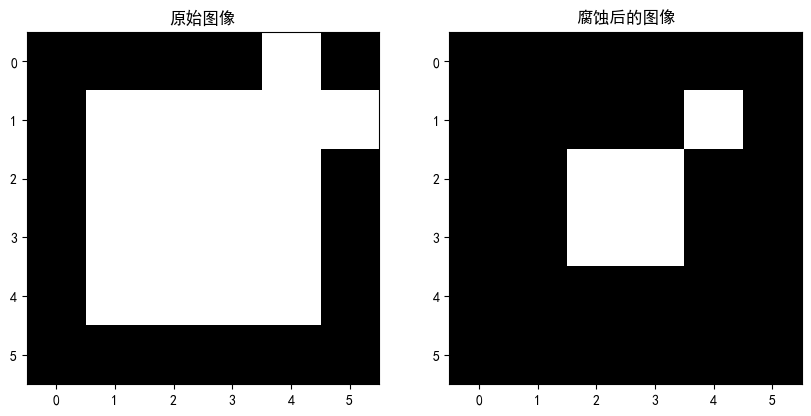

In [154]:
# 对img1进行腐蚀
erode_image = cv.erode(image, structure2)
# 展示结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('原始图像')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('腐蚀后的图像')
plt.imshow(erode_image, cmap='gray')

In [155]:
# 利用矩形元素与十字结构元素分别对黑背景图像和白背景图像进行腐蚀
erode_black_1 = cv.erode(black, structure1)
erode_black_2 = cv.erode(black, structure2)
erode_white_1 = cv.erode(white, structure1)
erode_white_2 = cv.erode(white, structure2)

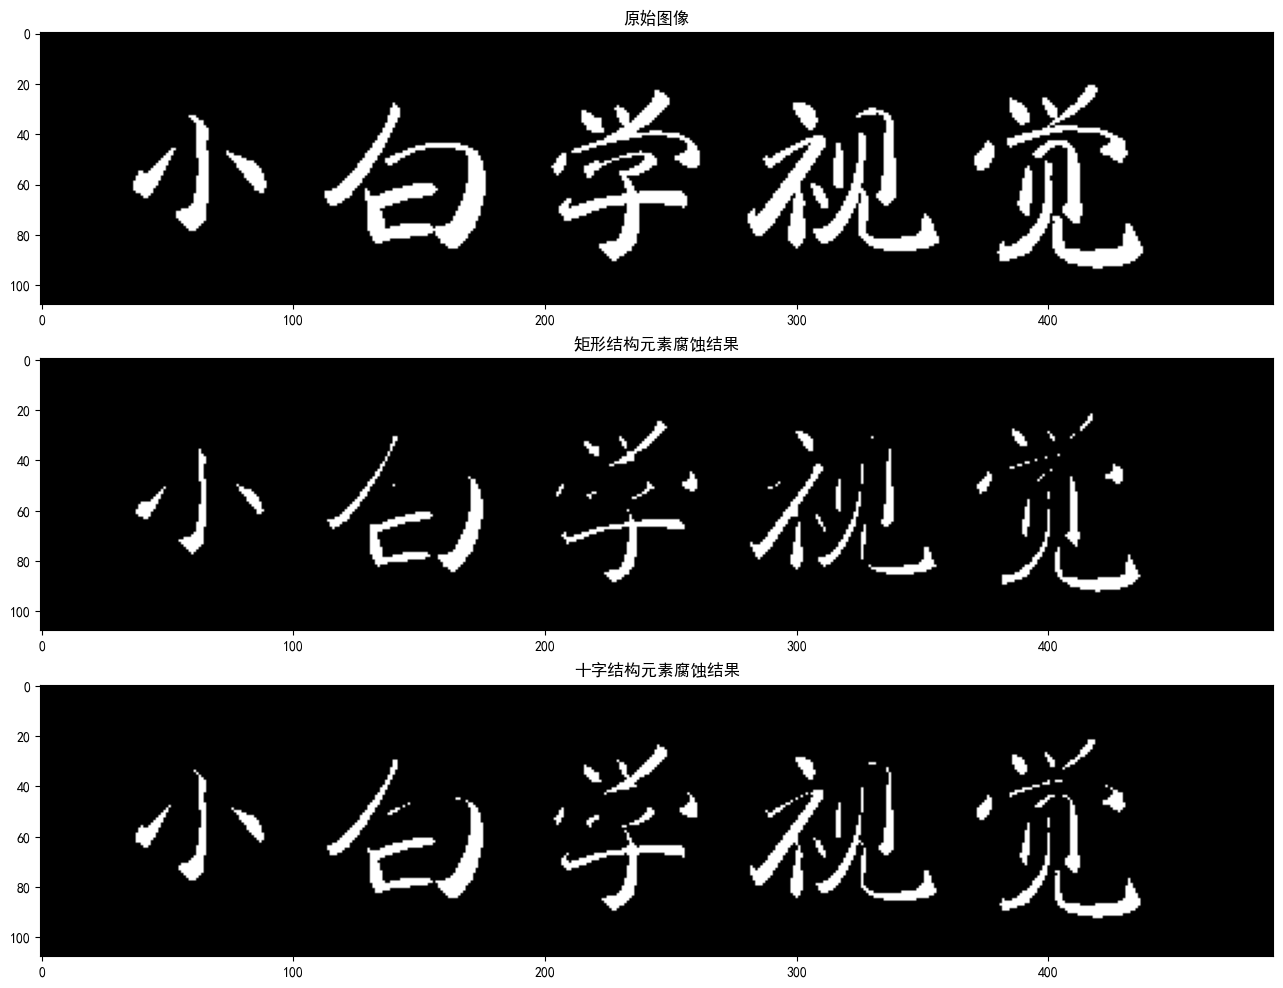

In [156]:
# 展示结果
plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 1)
plt.title('原始图像')
plt.imshow(black, cmap='gray')
plt.subplot(3, 1, 2)
plt.title('矩形结构元素腐蚀结果')
plt.imshow(erode_black_1, cmap='gray')
plt.subplot(3, 1, 3)
plt.title('十字结构元素腐蚀结果')
plt.imshow(erode_black_2, cmap='gray')

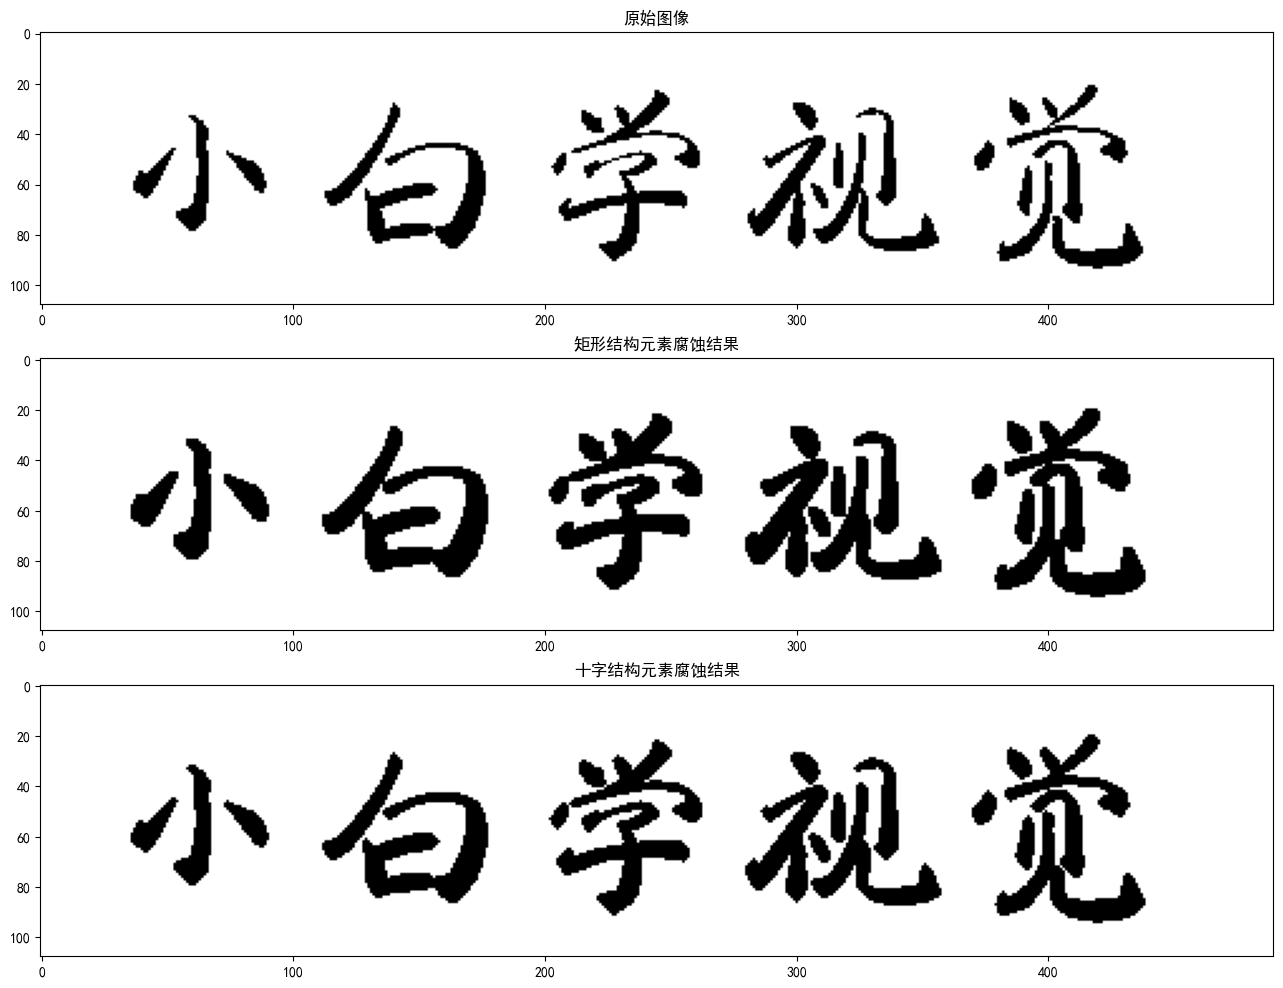

In [157]:
# 展示结果
plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 1)
plt.title('原始图像')
plt.imshow(white, cmap='gray')
plt.subplot(3, 1, 2)
plt.title('矩形结构元素腐蚀结果')
plt.imshow(erode_white_1, cmap='gray')
plt.subplot(3, 1, 3)
plt.title('十字结构元素腐蚀结果')
plt.imshow(erode_white_2, cmap='gray')

In [158]:
# 将图像转换为二值图像，同时将黑白区域互换
# 二值化的阈值设置为50
rice_BW = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
# 利用矩形结构元素腐蚀图像
erode_riceBW = cv.erode(rice_BW[1], structure1)
# 统计连通域
count, dst, stats, centroids = cv.connectedComponentsWithStats(rice_BW[1], ltype=cv.CV_16U)
erode_count, erode_dst, erode_stats, erode_centroids = cv.connectedComponentsWithStats(erode_riceBW, ltype=cv.CV_16U)
# 以不同的颜色填充不同的连通域
erode_rice = img
rice = fill_color(img, dst, count)
erode_rice = fill_color(erode_rice, erode_dst, erode_count)
# 绘制外接矩形及矩形的中心点，并进行标记
mark(rice, count, stats, centroids)
mark(erode_rice, erode_count, erode_stats, erode_centroids)

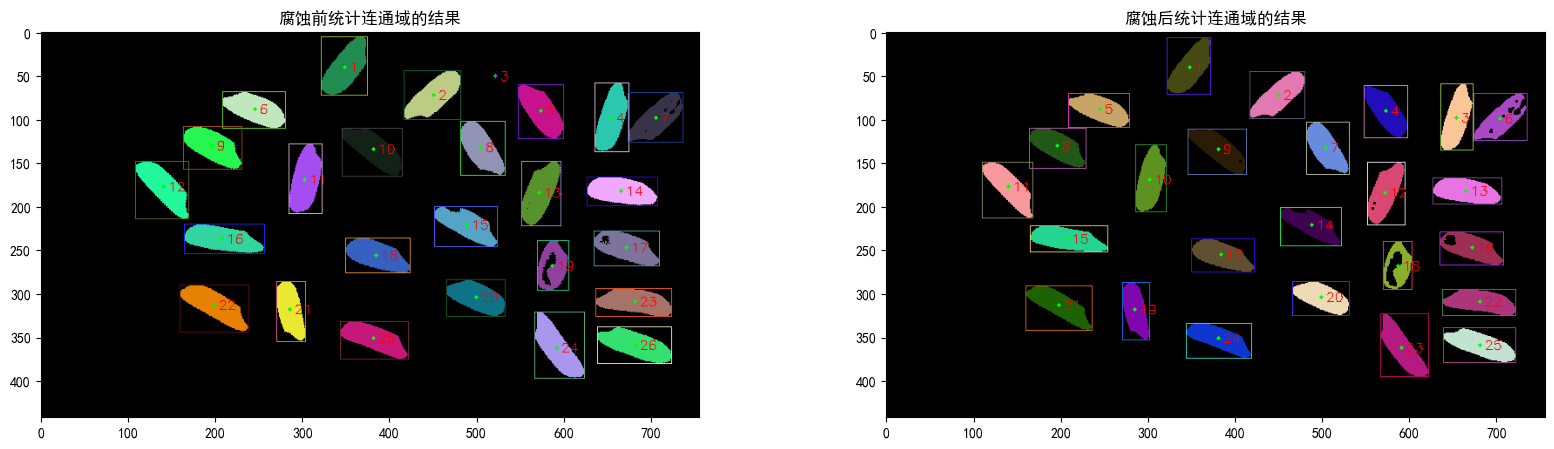

In [159]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('腐蚀前统计连通域的结果')
plt.imshow(rice[:, :, [2, 1, 0]])
plt.subplot(1, 2, 2)
plt.title('腐蚀后统计连通域的结果')
plt.imshow(erode_rice[:, :, [2, 1, 0]])